# E5 - Census Income Project


## Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state. 

In [1]:
#importing all the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import os

In [2]:
#getting data
os.chdir("C:\GitBash\Files")
df = pd.read_csv("census_income.csv")

## DATA INSPECTION 

In [3]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
27328,29,Private,162551,Masters,14,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,0,0,40,Hong,>50K
29697,55,?,227203,Assoc-acdm,12,Married-spouse-absent,?,Not-in-family,White,Female,0,0,5,United-States,<=50K
5595,31,Private,177675,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
18214,53,State-gov,151580,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,40,United-States,>50K
28101,24,Private,278107,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,60,United-States,<=50K


In [5]:
df.tail(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
#shape of data
df.shape

(32560, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


OBSERVATION

There are 6 columns with integer data type and 9 columns that have object data type. We will try to spearate these columns for easier analysis purpose.

In [9]:
#checking the null values
df.isnull().sum()


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

OBSERVATION

We have no null values in the datasets.

In [13]:
#dropping duplicate columns
print(f"Dataset before dropping duplicates: ", df.shape)
df.drop_duplicates(inplace=True)
print(f"Dataset after dropping duplicates: ", df.shape)

Dataset before dropping duplicates:  (32560, 15)
Dataset after dropping duplicates:  (32536, 15)


In [14]:
#checking number of unique values in each column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

OBSERVATION

We were able to see data that showed "?" in the columns "Workclass", "Occupation" and "Native_country". We will need to replace all the rows that have this "?" in them with a proper name

In [15]:
df['Workclass'].replace({' ?':' Other-Working-Class'},inplace=True)
df['Occupation'].replace({' ?':' Other-Occupation'},inplace=True)
df['Native_country'].replace({' ?':' Others'},inplace=True)

OBSERVATION

"?" data present in the columns  "Workclass", "Occupation" and "Native_country" are replaced with some related data.

## STATISTICAL SUMMARY 

In [16]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


OBSERVATION

The first column shows the count/rows occupied by the columns and since all of them have the same number it indicates that there are no missing values in them. Moving on to other columns I see abnormality in the columns "Capital_gain" and "Capital_loss" that have the value 0.0 for minimum value, 25% data slot, 50% data slot and 75% data slot. However the maximum values are quite huge in number so they might be termed as some kind of outlier but when we speak statistically such kind of data is possible and therefore we will either retain them or treat them accordingly as per our requirement.


In [17]:
#checking the categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [18]:
# checking the numeric columns for visualization
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)  

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


## DATA VISUALIZATION 

### UNIVARIATE ANALYSIS 

#### Categorical column visualization 

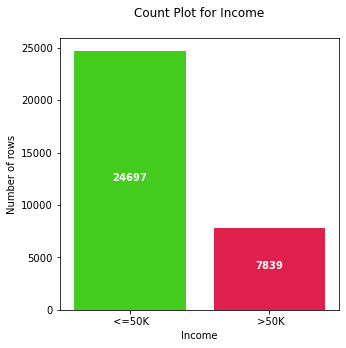

In [19]:
#Visualize the whether the income is above 50K or not
try:
    plt.figure(figsize=(5,5))
    col_name = 'Income'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

OBSERVATION

Target label "Income" column has imbalaned dataset .


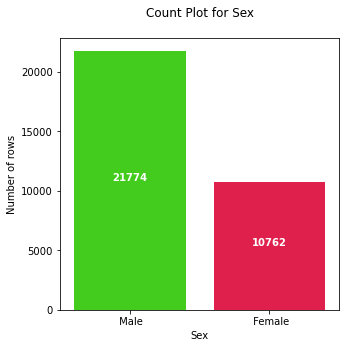

In [20]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Sex'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

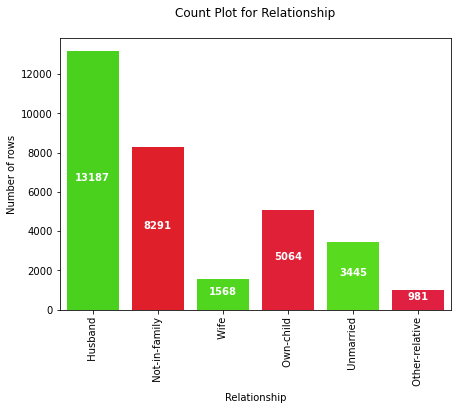

In [21]:
try:
    plt.figure(figsize=(7,5))
    col_name = 'Relationship'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

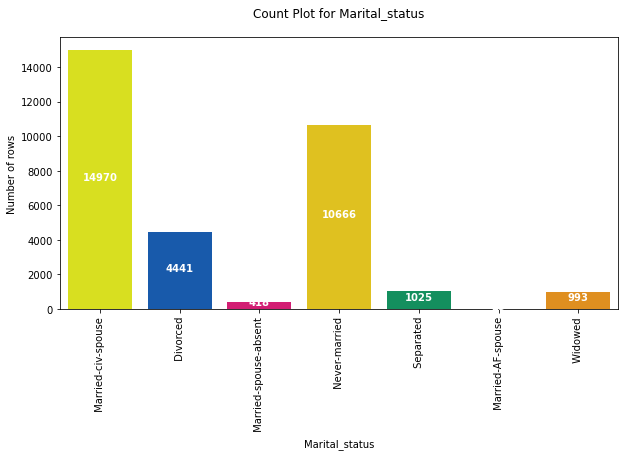

In [22]:
try:
    plt.figure(figsize=(10,5))
    col_name = 'Marital_status'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

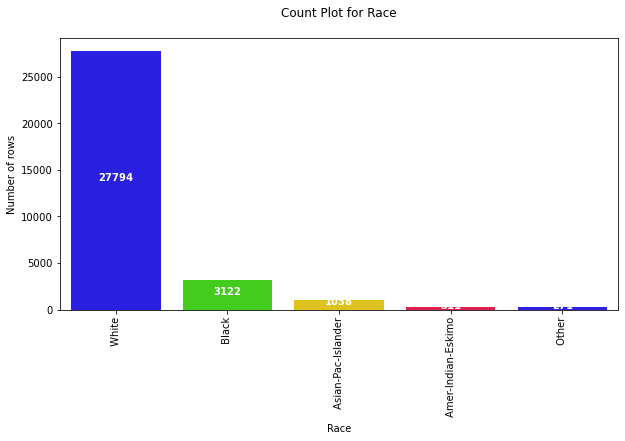

In [23]:
try:
    plt.figure(figsize=(10,5))
    col_name = 'Race'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

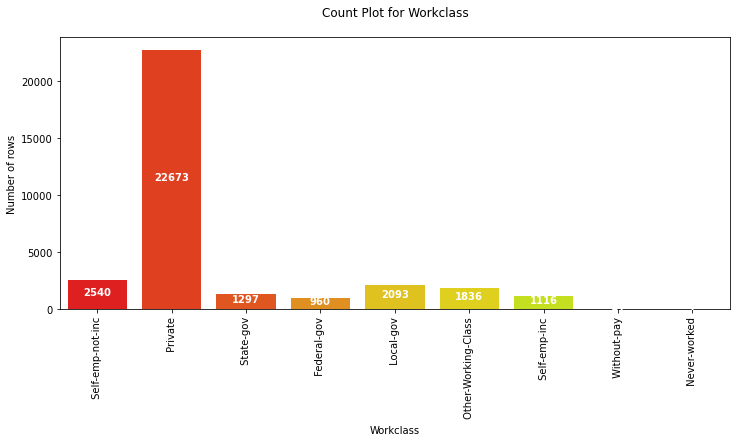

In [24]:
try:
    plt.figure(figsize=(12,5))
    col_name = 'Workclass'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

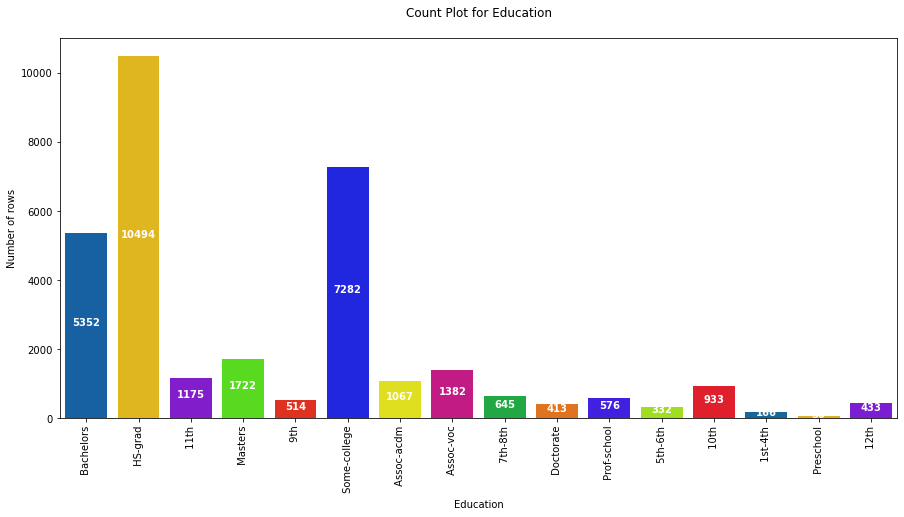

In [25]:
try:
    plt.figure(figsize=(15,7))
    col_name = 'Education'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

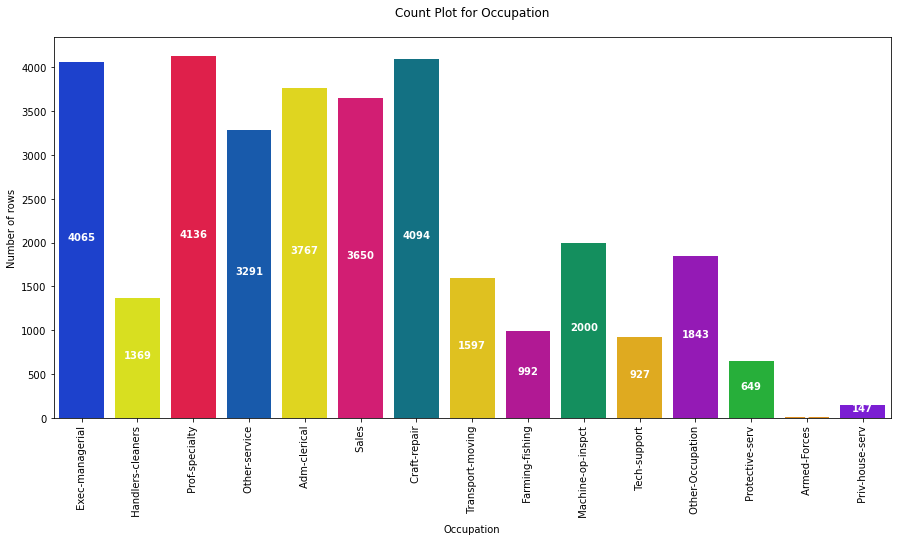

In [26]:
try:
    plt.figure(figsize=(15,7))
    col_name = 'Occupation'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

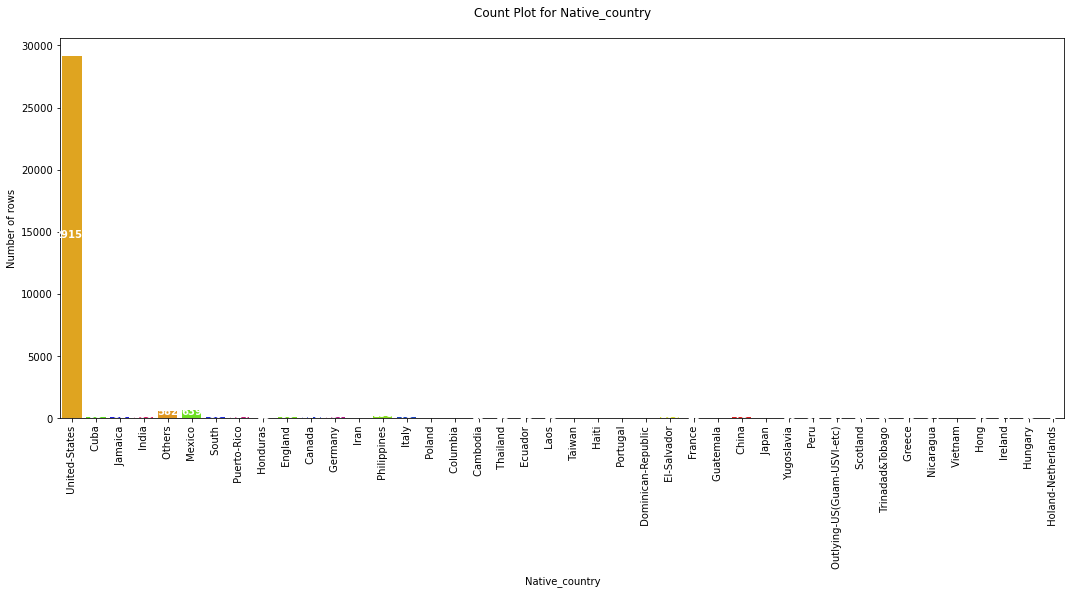

In [27]:
try:
    plt.figure(figsize=(18,7))
    col_name = 'Native_country'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

### Bivariate Analysis
  

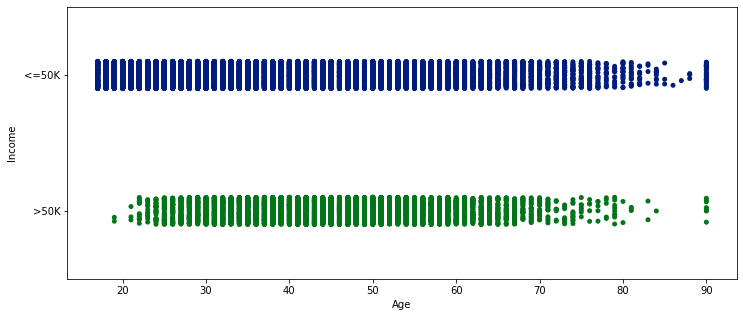

In [28]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Age', y = 'Income', data=df)
plt.show()

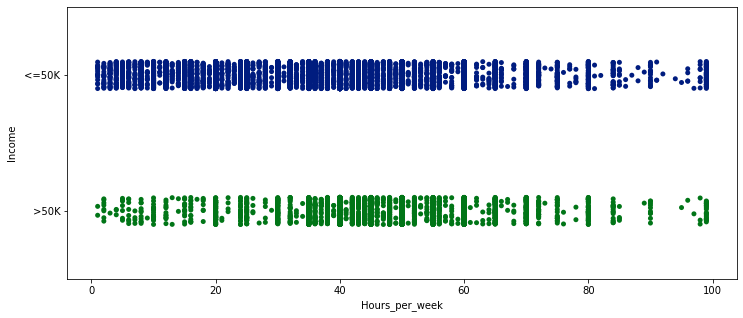

In [29]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Hours_per_week', y = 'Income', data=df)
plt.show()

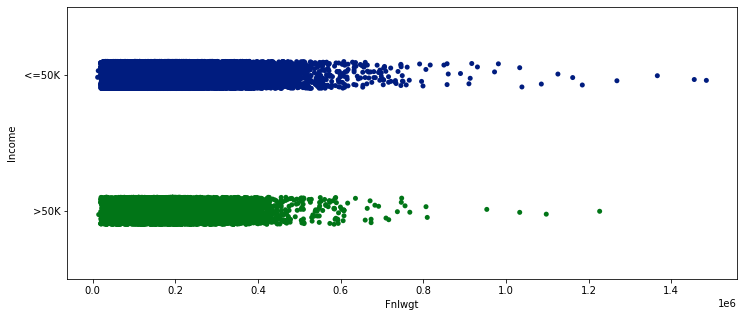

In [30]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Fnlwgt', y = 'Income', data=df)
plt.show()

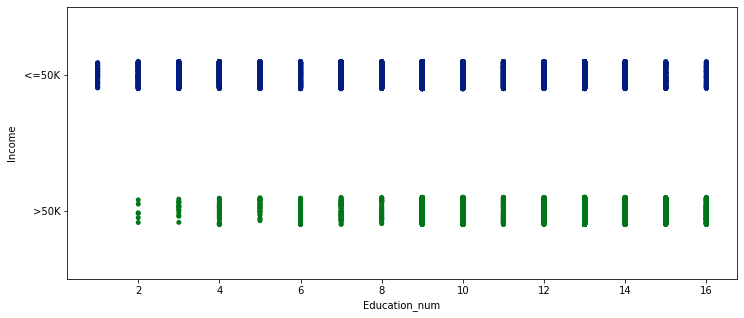

In [31]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Education_num', y = 'Income', data=df)
plt.show()

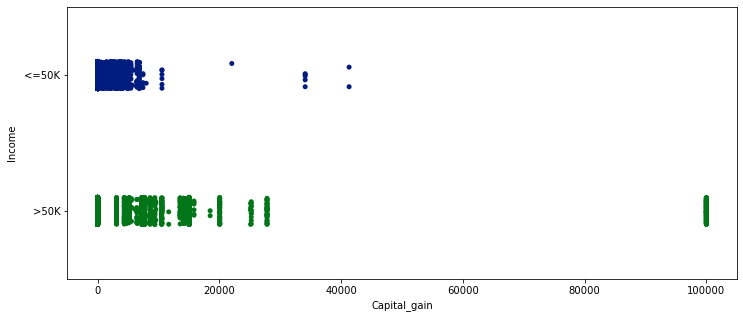

In [32]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Capital_gain', y = 'Income', data=df)
plt.show()

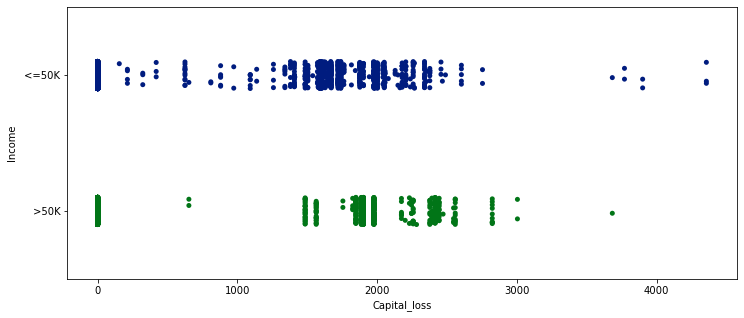

In [33]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Capital_loss', y = 'Income', data=df)
plt.show()

### Multivariant Analysis 

Text(0, 0.5, 'Percentage of People')

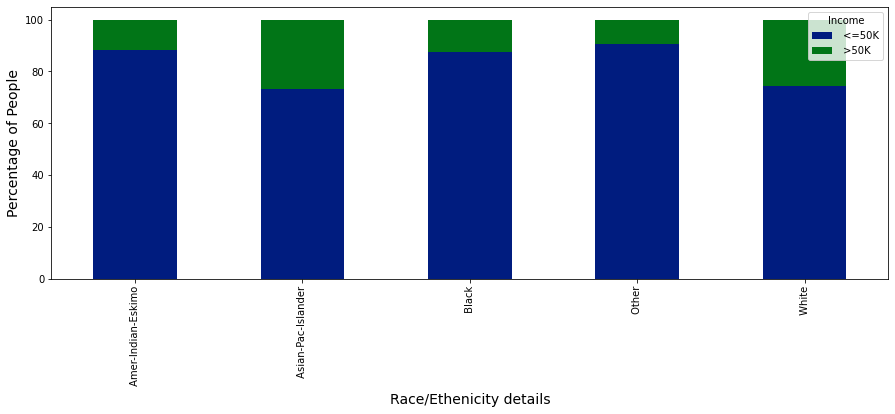

In [34]:
tbl = pd.crosstab(df['Race'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Race/Ethenicity details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Text(0, 0.5, 'Percentage of People')

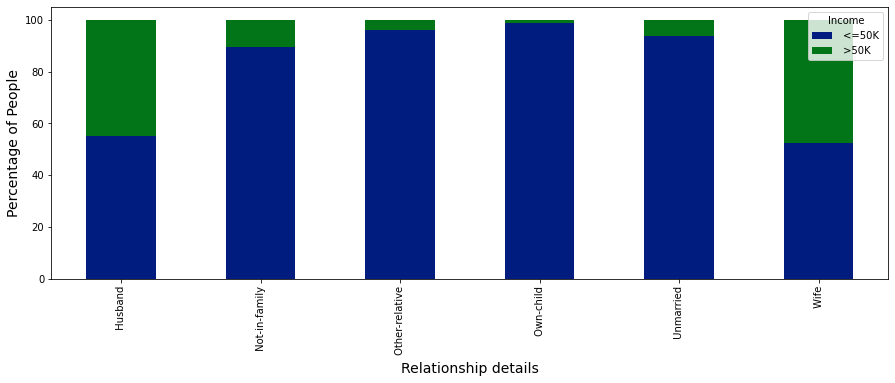

In [35]:
tbl = pd.crosstab(df['Relationship'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Relationship details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Text(0, 0.5, 'Percentage of People')

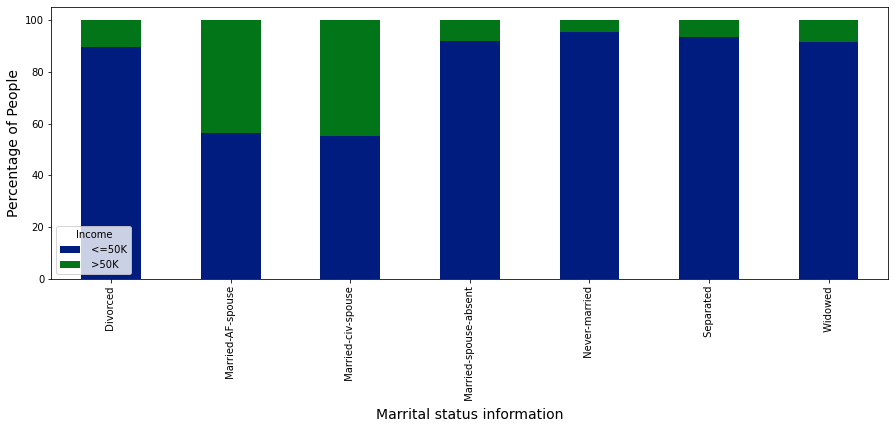

In [36]:
tbl = pd.crosstab(df['Marital_status'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Marrital status information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Text(0, 0.5, 'Percentage of People')

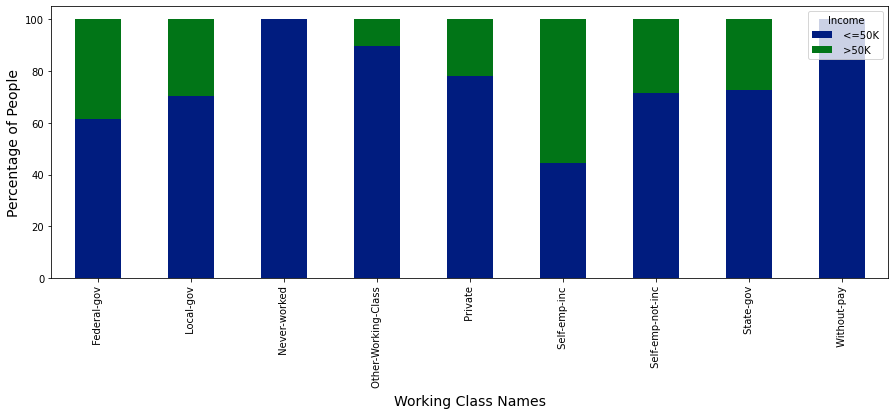

In [37]:
tbl = pd.crosstab(df['Workclass'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Working Class Names', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Text(0, 0.5, 'Percentage of People')

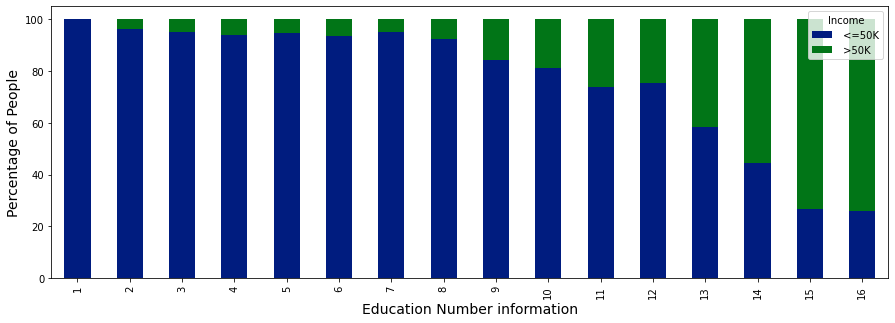

In [38]:
tbl = pd.crosstab(df['Education_num'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Education Number information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)


Text(0, 0.5, 'Percentage of People')

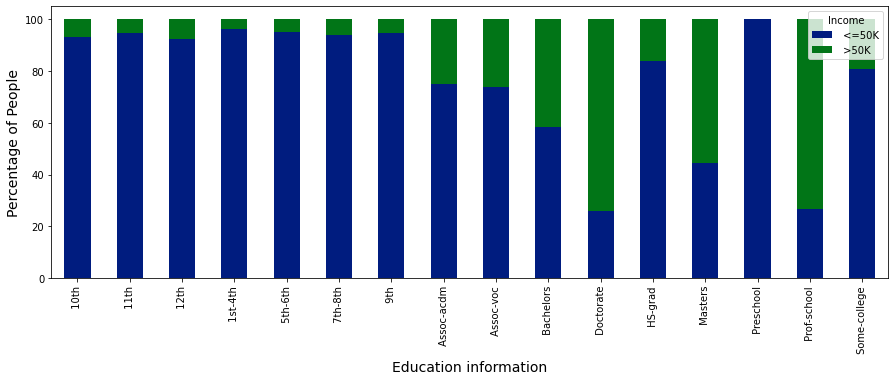

In [39]:
tbl = pd.crosstab(df['Education'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Education information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Text(0, 0.5, 'Percentage of People')

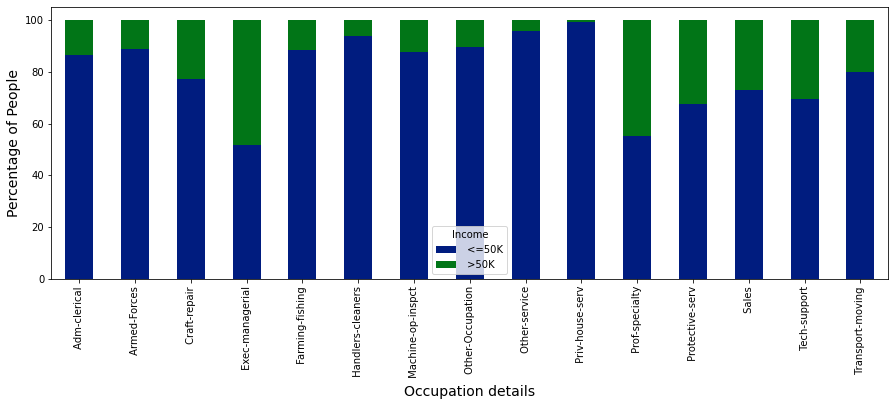

In [40]:
tbl = pd.crosstab(df['Occupation'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Occupation details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Text(0, 0.5, 'Percentage of People')

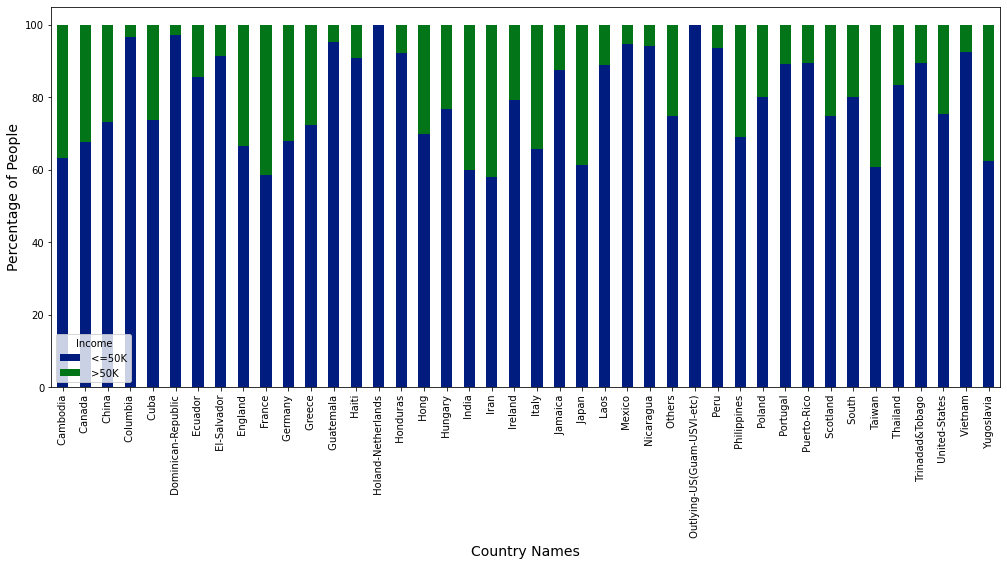

In [41]:
tbl = pd.crosstab(df['Native_country'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(col_name).plot(kind='bar',stacked=True,figsize=(17,7))
plt.xlabel('Country Names', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Text(0, 0.5, 'Percentage of People')

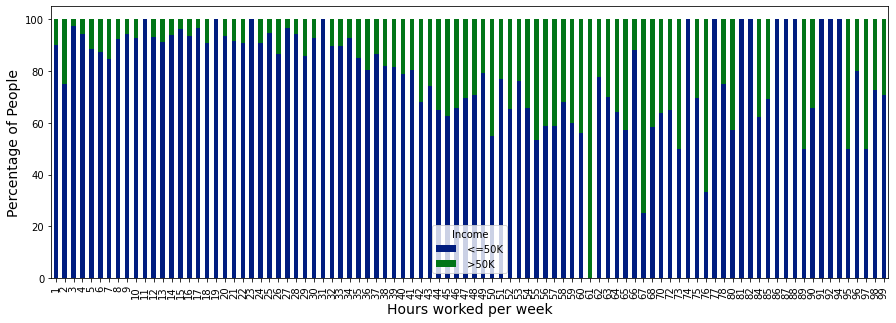

In [42]:
tbl = pd.crosstab(df['Hours_per_week'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Hours worked per week', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Text(0, 0.5, 'Percentage of People')

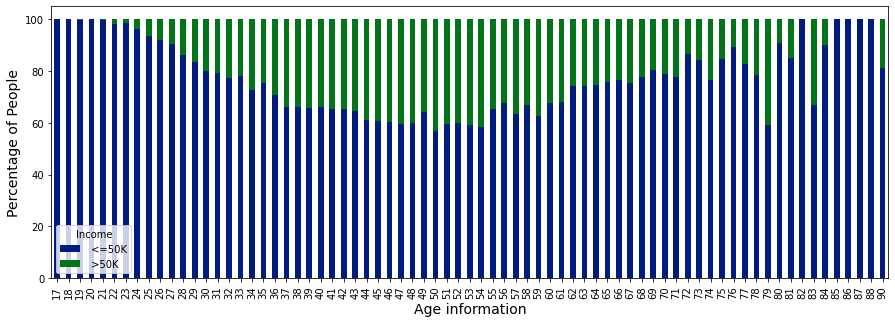

In [43]:
tbl = pd.crosstab(df['Age'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Age information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)


#### VIOLIN PLOT 

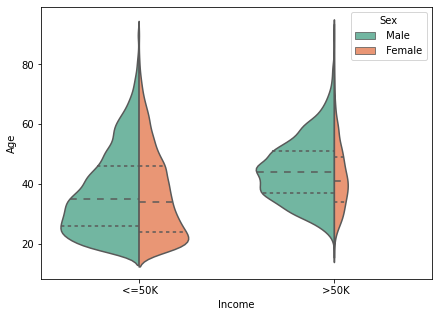

In [44]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Income", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

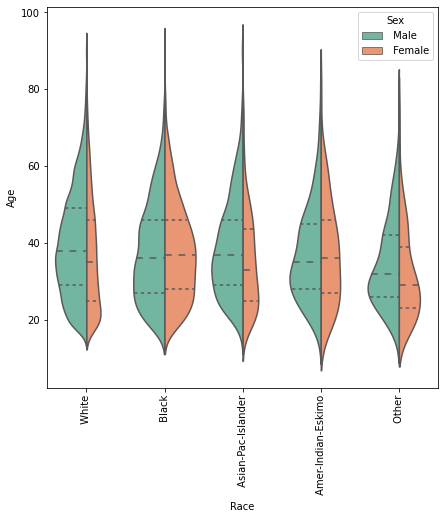

In [45]:
plt.figure(figsize=(7,7))
sns.violinplot(x="Race", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

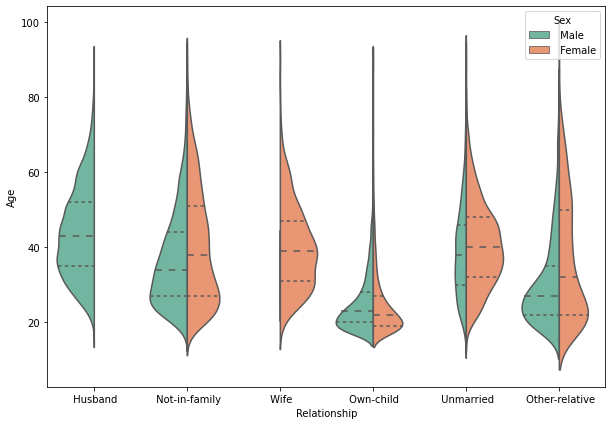

In [46]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Relationship", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

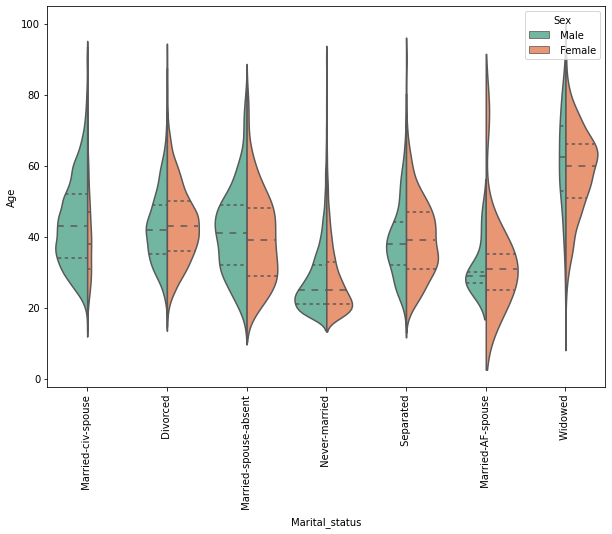

In [47]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Marital_status", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

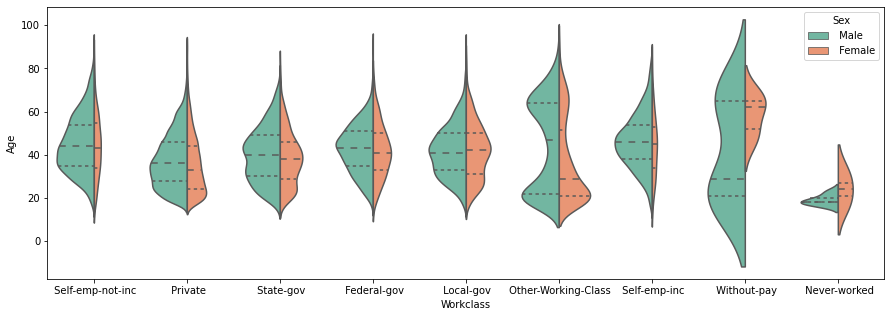

In [48]:
plt.figure(figsize=(15,5))
sns.violinplot(x="Workclass", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

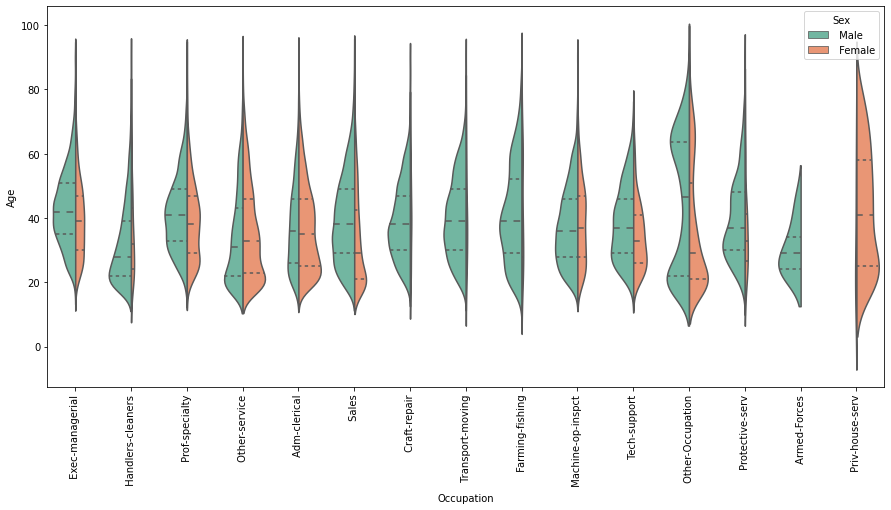

In [49]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Occupation", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

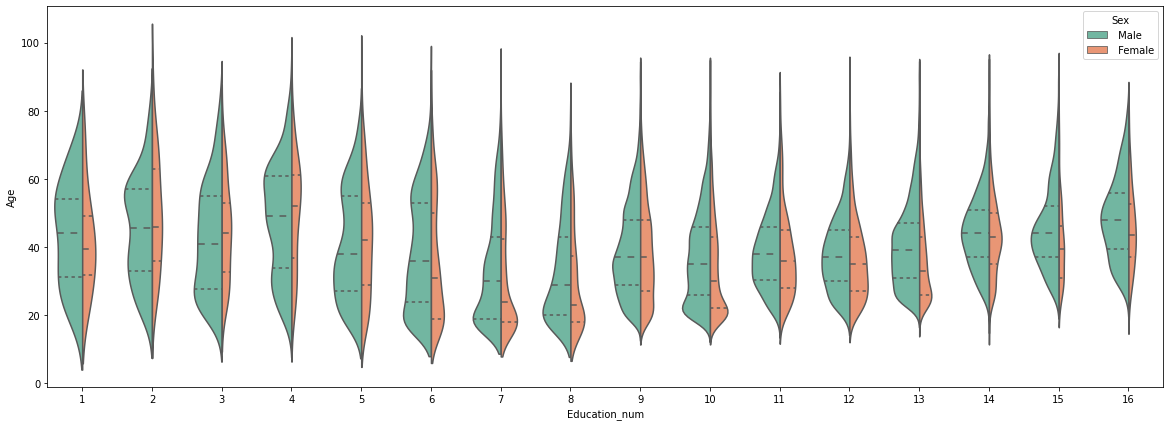

In [50]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education_num", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

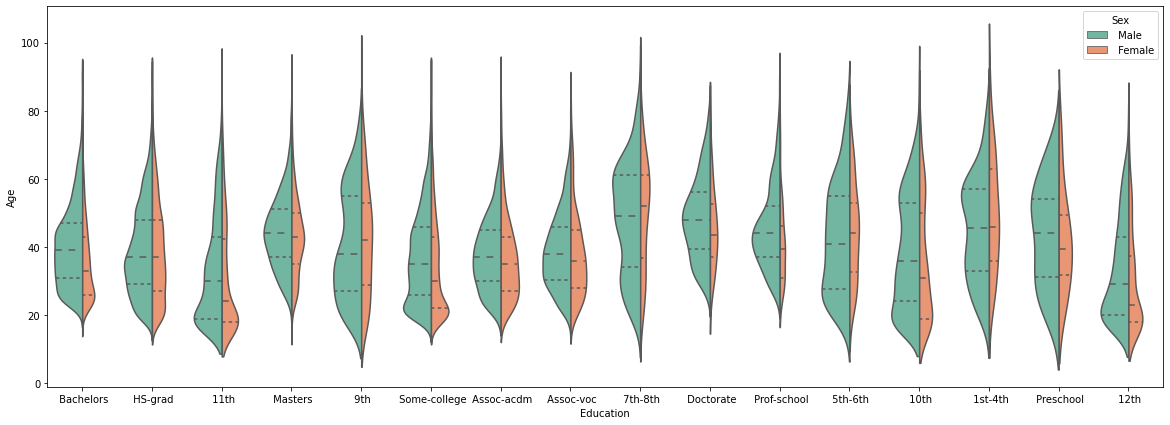

In [51]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

## OUTLIERS 

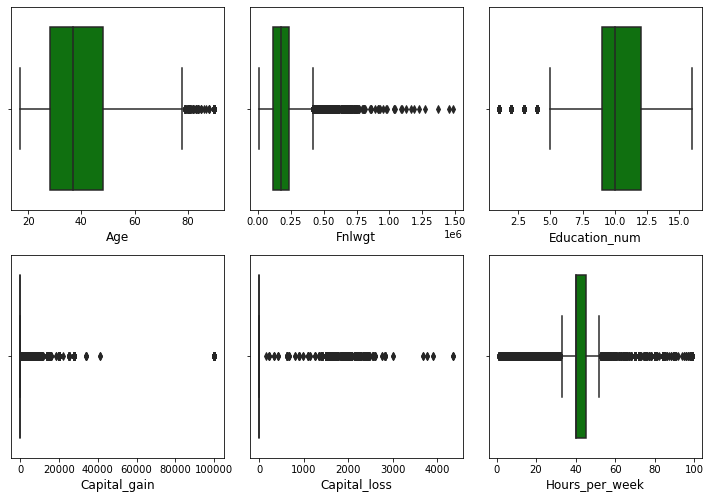

In [52]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="green")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

OBSERVATION

Outliers are present in these numerical columns.We will remove outliers from features column using Zscore method.

### REMOVING OUTLIERS 

##### Using zscore to remove outliers


In [54]:
#features containing outliers
features = df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss','Hours_per_week']]


In [55]:
#Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.836961,1.008703,1.134817,0.145969,0.216747,2.222450
1,0.042934,0.245008,0.420646,0.145969,0.216747,0.035664
2,1.056935,0.425720,1.198377,0.145969,0.216747,0.035664
3,0.776180,1.408036,1.134817,0.145969,0.216747,0.035664
4,0.116259,0.898091,1.523683,0.145969,0.216747,0.035664
...,...,...,...,...,...,...
32555,0.849505,0.639647,0.745951,0.145969,0.216747,0.197648
32556,0.103715,0.335469,0.420646,0.145969,0.216747,0.035664
32557,1.423558,0.358812,0.420646,0.145969,0.216747,0.035664
32558,1.216128,0.110897,0.420646,0.145969,0.216747,1.655506


In [56]:
#creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [57]:
# Shape of original dataset
df.shape

(32536, 15)

In [58]:
# Shape of new dataframe
new_df.shape

(29808, 15)

#### LOSS PERCENTAGE 

In [59]:
loss_percent=(32536-29808)/32536*100
print(loss_percent,'%')

8.384558642734202 %


OBSERVATION

8.38 % data loss is acceptable

df_new is the new data set after all the unnecessary columns and all the outliers apart from target columns (with z<3 z score) are removed

## ENCODING CATEGORIAL COLUMNS USING LABEL ENCODER 

In [61]:
le = LabelEncoder()
df["Income"] = le.fit_transform(df["Income"])
df.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [64]:
# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['Workclass'] = oe.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Marital_status'] = oe.fit_transform(df['Marital_status'].values.reshape(-1,1))
df['Occupation'] = oe.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Relationship'] = oe.fit_transform(df['Relationship'].values.reshape(-1,1))
df['Native_country'] = oe.fit_transform(df['Native_country'].values.reshape(-1,1))
df['Race'] = oe.fit_transform(df['Race'].values.reshape(-1,1))
df['Sex'] = oe.fit_transform(df['Sex'].values.reshape(-1,1))
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,4.0,0
4,37,4.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,39.0,0


In [65]:
print(f"Shape of our Dataframe after encoding is", df.shape)
df.isnull().sum()

Shape of our Dataframe after encoding is (32536, 15)


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

## CORRELATION 

In [67]:
# Checking the correlation between features and the target
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.008658,-0.076448,-0.010551,0.036224,-0.266142,-0.006211,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000199,0.234039
Workclass,0.008658,1.000000,-0.017959,0.000939,-0.009076,-0.021033,-0.000473,-0.060656,0.053442,0.076756,0.030576,0.000970,0.059954,-0.010064,0.002289
Fnlwgt,-0.076448,-0.017959,1.000000,-0.028065,-0.043353,0.028154,-0.000194,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.064337,-0.009521
Education,-0.010551,0.000939,-0.028065,1.000000,0.359105,-0.038413,-0.034530,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.077042,0.079361
Education_num,0.036224,-0.009076,-0.043353,0.359105,1.000000,-0.069196,0.091507,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.081568,0.335299
Marital_status,-0.266142,-0.021033,0.028154,-0.038413,-0.069196,1.000000,0.028040,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.023431,-0.199187
Occupation,-0.006211,-0.000473,-0.000194,-0.034530,0.091507,0.028040,1.000000,-0.039937,-0.004093,0.043583,0.021137,0.011721,0.004395,-0.006413,0.045286
Relationship,-0.263744,-0.060656,0.008859,-0.011060,-0.094424,0.185542,-0.039937,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.009354,-0.250955
Race,0.029116,0.053442,-0.021484,0.014307,0.031998,-0.067942,-0.004093,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.131134,0.071855
Sex,0.088708,0.076756,0.027113,-0.027426,0.012181,-0.129425,0.043583,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,-0.002381,0.215984


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Workclass'),
  Text(0, 2.5, 'Fnlwgt'),
  Text(0, 3.5, 'Education'),
  Text(0, 4.5, 'Education_num'),
  Text(0, 5.5, 'Marital_status'),
  Text(0, 6.5, 'Occupation'),
  Text(0, 7.5, 'Relationship'),
  Text(0, 8.5, 'Race'),
  Text(0, 9.5, 'Sex'),
  Text(0, 10.5, 'Capital_gain'),
  Text(0, 11.5, 'Capital_loss'),
  Text(0, 12.5, 'Hours_per_week'),
  Text(0, 13.5, 'Native_country'),
  Text(0, 14.5, 'Income')])

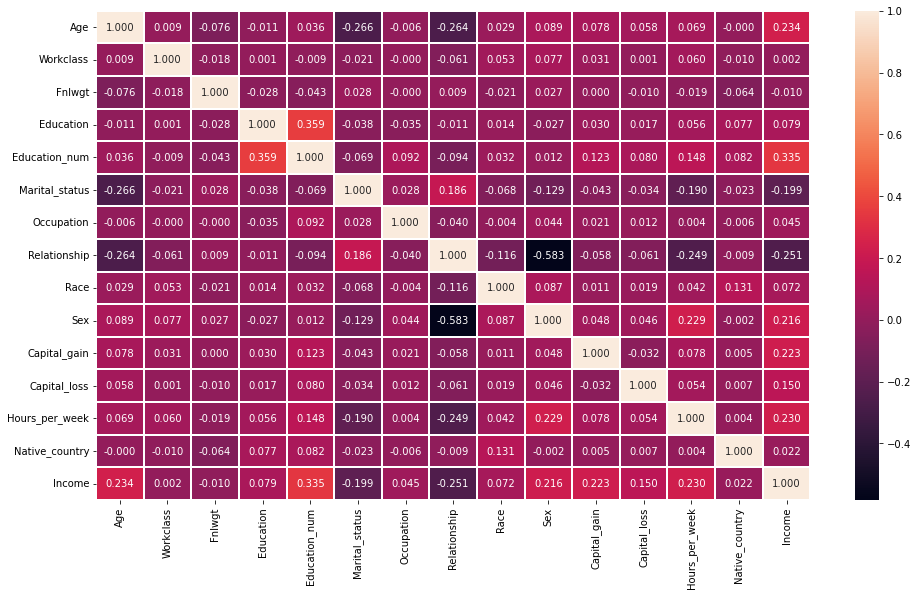

In [68]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

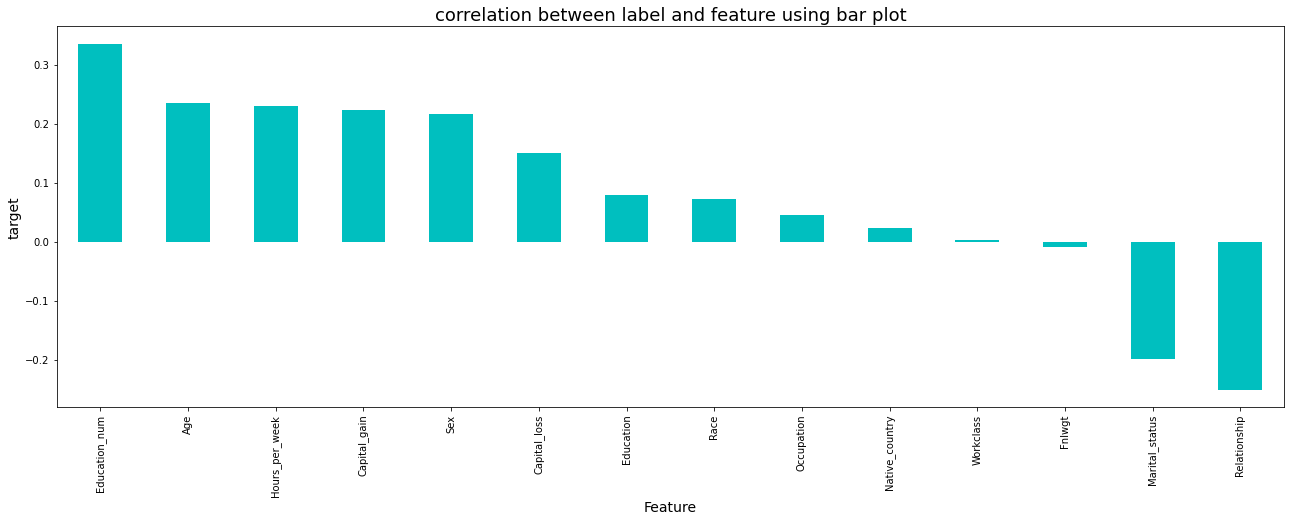

In [69]:
# Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(22,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

OBSERVATION

Columns 'relationship' and 'marital status' are  negatively correlated rest all the other feature columns are positively correlated with our label column.



## SKEWNESS 

In [66]:
df.skew().sort_values()

Native_country    -3.902282
Race              -2.435283
Education         -0.934180
Sex               -0.719400
Workclass         -0.658999
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.089872
Hours_per_week     0.228752
Age                0.557657
Relationship       0.786514
Income             1.211640
Fnlwgt             1.447695
Capital_loss       4.592622
Capital_gain      11.949245
dtype: float64

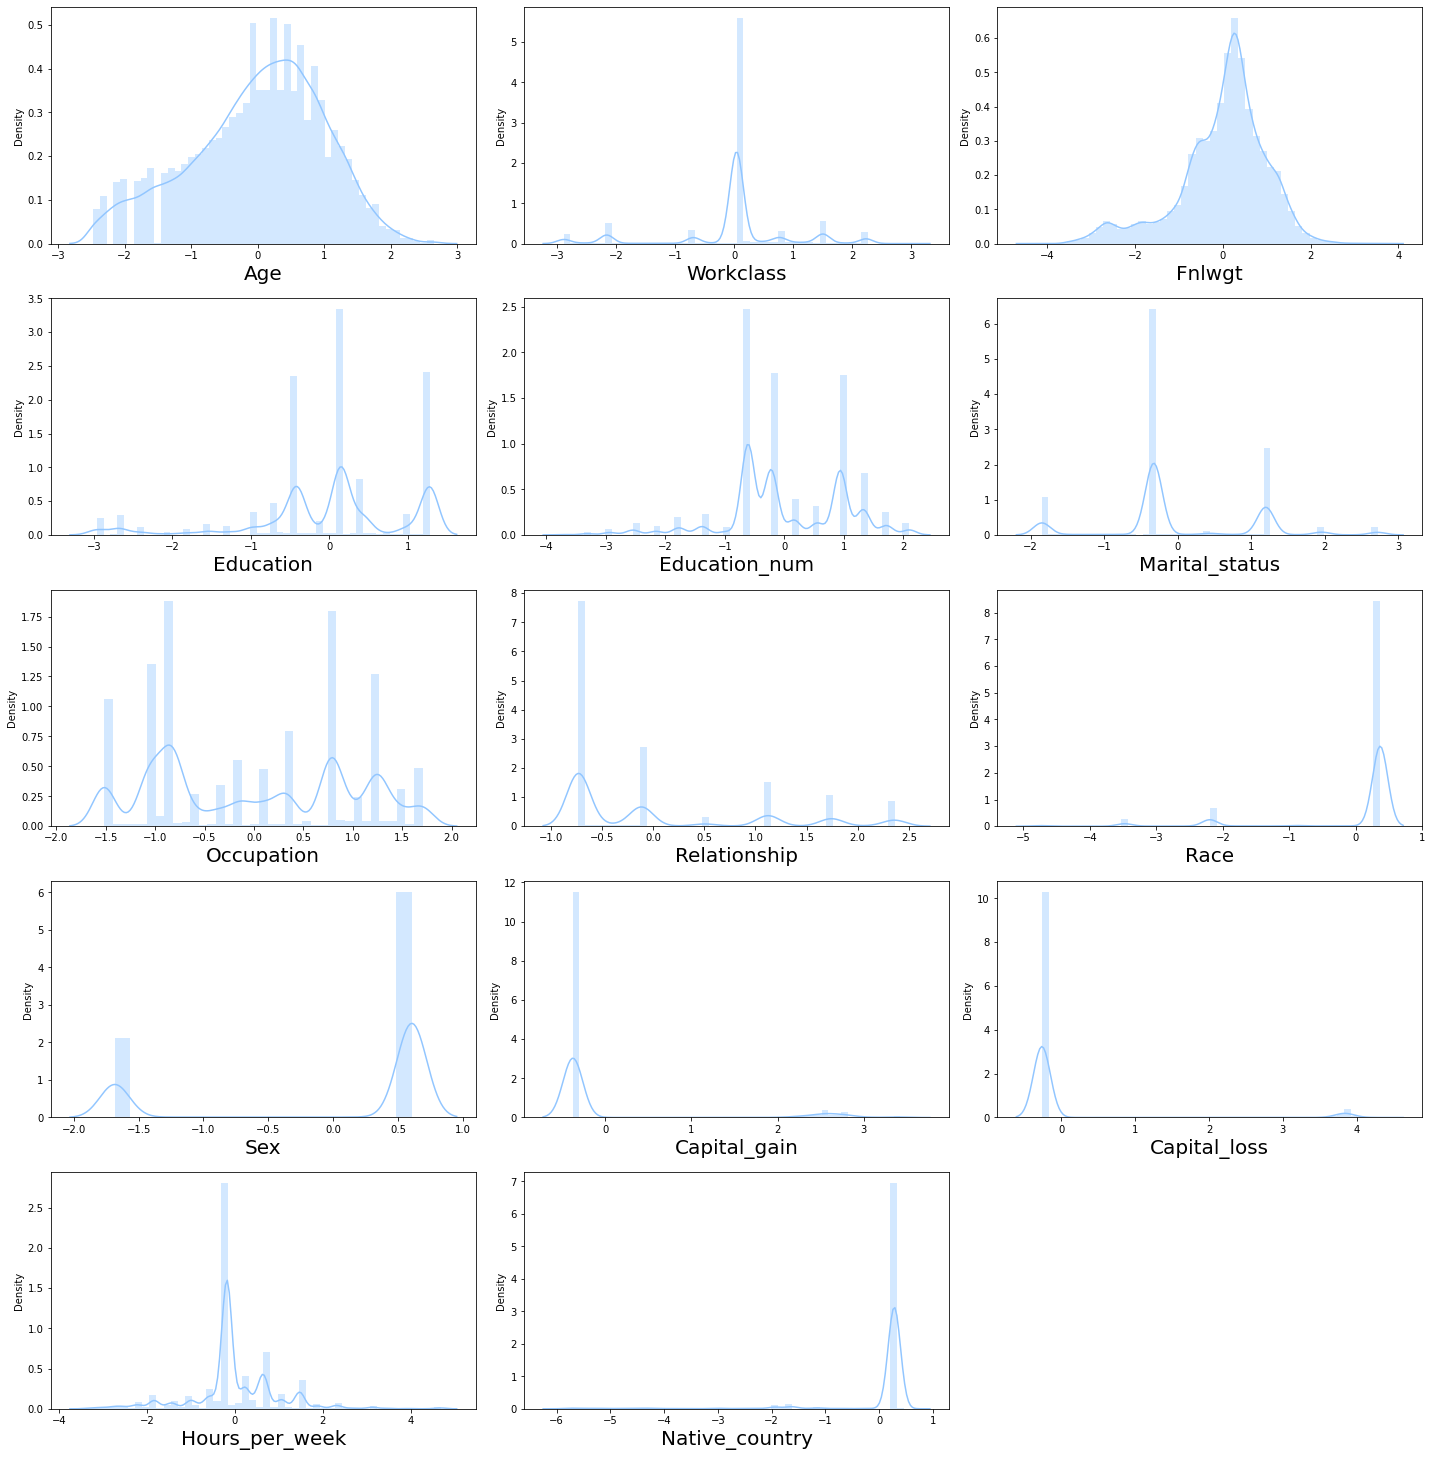

In [88]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

##### REMOVING SKEWNESS USING LOG TRANSFORMER 

In [70]:
#applying log transform to numeric columns
for col in num_col:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [74]:
#checking skewness after applying log transform
df.skew()

Age              -0.113859
Workclass        -0.658999
Fnlwgt           -0.842301
Education        -0.934180
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.089872
Relationship      0.786514
Race             -2.435283
Sex              -0.719400
Capital_gain      3.095326
Capital_loss      4.305624
Hours_per_week    0.228752
Native_country   -3.902282
Income            1.211640
dtype: float64

OBSERVATION
 
Skewness in numeric columns have been reduced

#### Splitting the new dataset into Features and Target 

In [78]:
X = df.drop('Income', axis=1)
Y = df['Income']

In [79]:
# Dimension of x
X.shape

(32536, 14)

In [80]:
# Dimension of y
Y.shape

(32536,)

In [82]:
Y.value_counts()

0    24697
1     7839
Name: Income, dtype: int64

### SMOTE (STANDARDISING TARGET COLUMN) 

In [89]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, Y = SM.fit_resample(X,Y)

In [90]:
Y.value_counts()

0    24697
1    24697
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

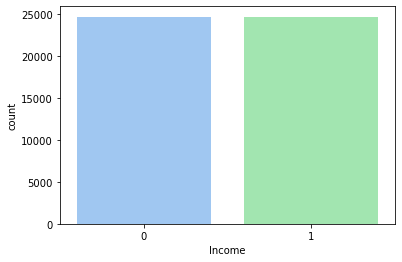

In [91]:
# Visualize the data after balancing
sns.countplot(Y)

OBSERVATION

Data in Target Column "Income" is balanced using SMOTE

## STANDARD SCALING 

In [92]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.817412,1.502752,-1.113339,-0.418493,0.937092,-0.324533,-0.825850,-0.730717,0.365131,0.606819,-0.376661,-0.26191,-2.409629,0.279658
1,-0.031372,0.038544,0.496341,0.146382,-0.611749,-1.848020,-0.365563,-0.112474,0.365131,0.606819,-0.376661,-0.26191,-0.178254,0.279658
2,0.998261,0.038544,0.639798,-2.677994,-1.386169,-0.324533,-0.365563,-0.730717,-2.196965,0.606819,-0.376661,-0.26191,-0.178254,0.279658
3,-0.968754,0.038544,1.259020,-0.418493,0.937092,-0.324533,0.785155,2.360497,-2.196965,-1.683998,-0.376661,-0.26191,-0.178254,-5.270504
4,-0.113558,0.038544,0.965818,0.428820,1.324302,-0.324533,-0.825850,2.360497,0.365131,-1.683998,-0.376661,-0.26191,-0.178254,0.279658


our data set is ready for Model Building.

# MACHINE LEARNING 

Since the y (Target) has Categorical values, we will use Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
LR = LogisticRegression()

In [94]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 78.28974005992389 on Random State 770


OBSERVATION

We found out Best Accuracy on Random State 770 

In [95]:
# Importing required libraries
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [96]:
# creating a function to run all the classifiers

def classifier(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=36)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [97]:
#Logistic Regression
model = LogisticRegression()
classifier(model, X, Y)

Accuracy Score: 77.16368053446705

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      4890
           1       0.77      0.79      0.78      4989

    accuracy                           0.77      9879
   macro avg       0.77      0.77      0.77      9879
weighted avg       0.77      0.77      0.77      9879

Cross Validation Score: 77.25636119294936

Accuracy Score - Cross Validation Score is -0.09268065848230833


In [98]:
# Naive Bayes
model = GaussianNB()
classifier(model, X, Y)

Accuracy Score: 78.60107298309545

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      4890
           1       0.79      0.78      0.79      4989

    accuracy                           0.79      9879
   macro avg       0.79      0.79      0.79      9879
weighted avg       0.79      0.79      0.79      9879

Cross Validation Score: 78.45692834707123

Accuracy Score - Cross Validation Score is 0.14414463602422245


In [99]:
#SVC Classifier(RBF)
model = SVC(kernel='rbf')
classifier(model, X, Y)

Accuracy Score: 84.11782569085939

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      4890
           1       0.81      0.89      0.85      4989

    accuracy                           0.84      9879
   macro avg       0.84      0.84      0.84      9879
weighted avg       0.84      0.84      0.84      9879



KeyboardInterrupt: 

In [100]:
#SVC Classifier(LINEAR)
model = SVC(kernel='linear')
classifier(model, X, Y)

Accuracy Score: 77.67992711812937

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77      4890
           1       0.76      0.81      0.79      4989

    accuracy                           0.78      9879
   macro avg       0.78      0.78      0.78      9879
weighted avg       0.78      0.78      0.78      9879

Cross Validation Score: 77.49323629031345

Accuracy Score - Cross Validation Score is 0.18669082781592294


In [101]:
#Decision Tree Classifier
model = DecisionTreeClassifier()
classifier(model, X, Y)

Accuracy Score: 85.35276849883591

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4890
           1       0.86      0.85      0.85      4989

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879

Cross Validation Score: 85.03671731043418

Accuracy Score - Cross Validation Score is 0.31605118840172963


In [102]:
#KNeighbors Classifier
model = KNeighborsClassifier()
classifier(model, X, Y)

Accuracy Score: 84.86688936127138

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84      4890
           1       0.81      0.92      0.86      4989

    accuracy                           0.85      9879
   macro avg       0.86      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879

Cross Validation Score: 84.90709830290922

Accuracy Score - Cross Validation Score is -0.040208941637843054


In [103]:
#SGD Classifier
model = SGDClassifier()
classifier(model, X, Y)

Accuracy Score: 75.77690049600162

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      4890
           1       0.75      0.78      0.77      4989

    accuracy                           0.76      9879
   macro avg       0.76      0.76      0.76      9879
weighted avg       0.76      0.76      0.76      9879

Cross Validation Score: 76.88991545626764

Accuracy Score - Cross Validation Score is -1.1130149602660282


In [104]:
#Random Forest Classifier
model = RandomForestClassifier(random_state=770)
classifier(model, X, Y)

Accuracy Score: 90.02935519789452

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4890
           1       0.89      0.91      0.90      4989

    accuracy                           0.90      9879
   macro avg       0.90      0.90      0.90      9879
weighted avg       0.90      0.90      0.90      9879

Cross Validation Score: 89.80448873769863

Accuracy Score - Cross Validation Score is 0.22486646019588363


In [105]:
#ExtraTrees Classifier
model = ExtraTreesClassifier(random_state=770)
classifier(model, X, Y)

Accuracy Score: 90.03947767992712

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      4890
           1       0.89      0.92      0.90      4989

    accuracy                           0.90      9879
   macro avg       0.90      0.90      0.90      9879
weighted avg       0.90      0.90      0.90      9879

Cross Validation Score: 90.14054181942873

Accuracy Score - Cross Validation Score is -0.10106413950161652


In [106]:
#AdaBoost Classifier
model = AdaBoostClassifier()
classifier(model, X, Y)

Accuracy Score: 85.7475452981071

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      4890
           1       0.84      0.88      0.86      4989

    accuracy                           0.86      9879
   macro avg       0.86      0.86      0.86      9879
weighted avg       0.86      0.86      0.86      9879

Cross Validation Score: 85.46385817900544

Accuracy Score - Cross Validation Score is 0.283687119101657


In [107]:
#Gradient Boosting Classifier
model = GradientBoostingClassifier()
classifier(model, X, Y)

Accuracy Score: 86.67881364510578

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      4890
           1       0.85      0.89      0.87      4989

    accuracy                           0.87      9879
   macro avg       0.87      0.87      0.87      9879
weighted avg       0.87      0.87      0.87      9879

Cross Validation Score: 86.62190004623878

Accuracy Score - Cross Validation Score is 0.05691359886699843


OBSERVATION

ExtraTreesClassifier gives the best results since the Accuracy Score - Cross Validation Score is the least along with higher Cross Validation Score and the highest Accuracy Score comparing all the models

### HYPER PARAMETER TUNING 

In [110]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=770)


In [111]:
x_test.shape

(9879, 14)

In [112]:
y_test.shape

(9879,)

In [113]:
x_train.shape

(39515, 14)

In [114]:
y_train.shape


(39515,)

In [115]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10],
              'random_state' : [None, 36]}

In [116]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [117]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10], 'random_state': [None, 36]})

In [118]:
GCV.best_params_ 

{'criterion': 'entropy',
 'max_features': 'log2',
 'n_jobs': 5,
 'random_state': None}

##### FINAL MODEL 

In [125]:
final_model = ExtraTreesRegressor(criterion = 'absolute_error', max_features = 'log2', n_jobs = 15)


In [126]:
#final fit
final_fit = final_model.fit(x_train,y_train)   


In [136]:
#predicting with best parameters

final_pred = final_model.predict(x_test)

#### SAVING MODEL IN PICKLE FORMAT 

In [138]:
#pickeling or serialization of a file
import pickle
filename = 'Census_Income_Project_Final_Model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

### PREDICTED COCLUSION 

In [140]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_model.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,0,0.00
1,0,0.40
2,0,0.28
3,1,0.80
4,1,0.90
...,...,...
9874,0,0.84
9875,1,0.44
9876,0,0.00
9877,1,1.00


In [141]:
#saving predicted values to csv
df_comparisonc.to_csv('Census_Income_Project_Prediction.csv')


FINAL OBSERVATION 

The best Regressor for model building with this target is ExtraTreesClassifierr. This classifier gave the best Accuracy Score as 90%.